In [120]:
import tweepy
from tweepy.auth import OAuthHandler
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import re, string

In [121]:
consumer_key = 'WDK4W9ePlrQRxd8PYiqOxCG1I'
consumer_secret = 'ApL9JC6JNNEw8qBMzATNGnAZGJNOxsO5vaYBud4Ue0SvlkB3Hp'
access_token = '857100378835484672-kFWmWKcFZ5NSWN0jEc2DZfvPBZNfRT4'
access_token_secret = 'txrMiwZ1UNAfhnHc7bHLn53zsZtfcvBEWROeOFx7GR2fR'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

### Trends on Twitter

In [122]:
'top trends by location using WOEID'
'WOEID for Nigeria is 23424908'

trends = api.trends_place(23424908)

In [123]:
only_trends = [trend['trends'] for trend in trends]
only_trends

[[{'name': 'Banky W',
   'url': 'http://twitter.com/search?q=%22Banky+W%22',
   'promoted_content': None,
   'query': '%22Banky+W%22',
   'tweet_volume': 34049},
  {'name': '#Sokoto',
   'url': 'http://twitter.com/search?q=%23Sokoto',
   'promoted_content': None,
   'query': '%23Sokoto',
   'tweet_volume': None},
  {'name': 'Putin',
   'url': 'http://twitter.com/search?q=Putin',
   'promoted_content': None,
   'query': 'Putin',
   'tweet_volume': 2285051},
  {'name': '#NSIAInnovationPrize',
   'url': 'http://twitter.com/search?q=%23NSIAInnovationPrize',
   'promoted_content': None,
   'query': '%23NSIAInnovationPrize',
   'tweet_volume': None},
  {'name': '#Redmi12CPriceSlash',
   'url': 'http://twitter.com/search?q=%23Redmi12CPriceSlash',
   'promoted_content': None,
   'query': '%23Redmi12CPriceSlash',
   'tweet_volume': None},
  {'name': 'Russia',
   'url': 'http://twitter.com/search?q=Russia',
   'promoted_content': None,
   'query': 'Russia',
   'tweet_volume': 2266274},
  {'name'

In [124]:
# extract trends and number of tweets
trend_list = []
tweet_count = []
promotions = []

for trend in only_trends:
    for value in trend:
        trend_list.append(value['name'])
        tweet_count.append(value['tweet_volume'])
        promotions.append(value['promoted_content'])
        
# create dataframe of tweets
twt_trends = pd.DataFrame({'trends':trend_list, 'tweets': tweet_count, 'promoted':promotions})


# remove trending hashtags
twt_trends = twt_trends[twt_trends.trends.str.count(r'\#\w+', re.I) !=1]
twt_trends.head()

# remove trends without tweets
twt_trends = twt_trends.dropna(subset='tweets')

# remove promoted trends
# first make 'None' a string
twt_trends.promoted = twt_trends.promoted.astype(str)
twt_trends[twt_trends.promoted == 'None']

,trends,tweets,promoted
0,Banky W,34049.0,None
2,Putin,2285051.0,None
5,Russia,2266274.0,None
8,Wagner,2874924.0,None
10,Gistlover,11408.0,None
11,Moscow,1113601.0,None
14,Ukraine,1154697.0,None
15,Cheating,49213.0,None
22,Prigozhin,1495781.0,None
25,Ronaldinho,14286.0,None


In [717]:
twt_trends.to_csv("C:\\Users\\user\\OneDrive\\Documents\\Data Projects\\Trending Tweets\\trends_june_24_2023.csv")

### Search Topics on Twitter

---- top 1 trend

In [125]:
twt_trends.trends[0]

'Banky W'

In [171]:
len(tweets)

100

### Function to extract tweets vis API

In [679]:
# function to extract a max_count of tweets based on a trend

def extract_tweets(trends, max_count):
    tweet_list = []
    
    if len(tweet_list) <= 100:
        tweets = api.search(trends, tweet_mode="extended", result_type='recent', count = 100)
            #tweet_list = []
        for tweet in tweets:
            tweet_id = tweet._json['id']
            date = tweet._json['created_at']
            text = tweet._json['full_text']
            username = tweet._json['user']['screen_name']
            user_location = tweet._json['user']['location']
            user_bio = tweet._json['user']['description']
            account_created = tweet._json['user']['created_at']
            verified_account = tweet._json['user']['verified']
            followers =  tweet._json['user']['friends_count']
            likes = tweet._json['user']['favourites_count']
    
            line = {'tweet_id':tweet_id, 'date':date, 'text':text, 'username':username, 'user_location':user_location,
                       'user_bio':user_bio, 'account_created':account_created, 'verified':verified_account, 'followers':followers,
                       'likes':likes}
    
        tweet_list.append(line)
    tweet_df = pd.DataFrame(tweet_list).sort_values('tweet_id', ascending=True)
              
    '''elif len(tweet_list) <= max_count:
        tweets = api.search(trends, tweet_mode="extended", count = 100, max_id = tweet_df['tweet_id'].min())
            
        for tweet in tweets:
            tweet_id = tweet._json['id']
            date = tweet._json['created_at']
            text = tweet._json['full_text']
            username = tweet._json['user']['screen_name']
            user_location = tweet._json['user']['location']
            user_bio = tweet._json['user']['description']
            account_created = tweet._json['user']['created_at']
            verified_account = tweet._json['user']['verified']
            followers =  tweet._json['user']['friends_count']
            likes = tweet._json['user']['favourites_count']
    
            line = {'tweet_id':tweet_id, 'date':date, 'text':text, 'username':username, 'user_location':user_location,
                       'user_bio':user_bio, 'account_created':account_created, 'verified':verified_account, 'followers':followers,
                       'likes':likes}
    
        tweet_list.append(line)
           
    df = pd.DataFrame(tweet_list)
    else:
        tweet_list'''
    

In [680]:
extract_tweets('Banky W', 500)

### First Iteration

In [584]:
'for first iter'
tweets = api.search("putin", result_type='recent', tweet_mode="extended", count = 100)
#len(tweets)

tweet_list = []
for tweet in tweets:
    tweet_id = tweet._json['id']
    date = tweet._json['created_at']
    text = tweet._json['full_text']
    username = tweet._json['user']['screen_name']
    user_location = tweet._json['user']['location']
    user_bio = tweet._json['user']['description']
    account_created = tweet._json['user']['created_at']
    verified_account = tweet._json['user']['verified']
    followers =  tweet._json['user']['friends_count']
    likes = tweet._json['user']['favourites_count']
    
    line = {'tweet_id':tweet_id, 'date':date, 'text':text, 'username':username, 'user_location':user_location,
           'user_bio':user_bio, 'account_created':account_created, 'verified':verified_account, 'followers':followers,
           'likes':likes}
    
    tweet_list.append(line)
tweet_df = pd.DataFrame(tweet_list)

### Subsequent Iterations

In [710]:
'subsequent iters'
tweets = api.search("endsars", tweet_mode="extended", count = 100, max_id = tweet_df['tweet_id'].min())


for tweet in tweets:
    tweet_id = tweet._json['id']
    date = tweet._json['created_at']
    text = tweet._json['full_text']
    username = tweet._json['user']['screen_name']
    user_location = tweet._json['user']['location']
    user_bio = tweet._json['user']['description']
    account_created = tweet._json['user']['created_at']
    verified_account = tweet._json['user']['verified']
    followers =  tweet._json['user']['friends_count']
    likes = tweet._json['user']['favourites_count']
    
    line = {'tweet_id':tweet_id, 'date':date, 'text':text, 'username':username, 'user_location':user_location,
           'user_bio':user_bio, 'account_created':account_created, 'verified':verified_account, 'followers':followers,
           'likes':likes}
    
    tweet_list.append(line)
tweet_df = pd.DataFrame(tweet_list) 
len(tweet_df)

5802

### Clean Data

In [705]:
def clean(text):
    text = str(text).title()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text) #remove url
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #remove punctuations
    text = re.sub('\n', '', text)
    text = re.sub('[0-9]', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('@\\S+', '', text)
    text = re.sub('RT', '', text)
    text = re.sub('Rt', '', text)
    return text

tweet_df['text'] = tweet_df['text'].apply(clean)

In [713]:
tweet_df.tail()

,tweet_id,date,text,username,user_location,user_bio,account_created,verified,followers,likes
5797,1672329803834195969,Fri Jun 23 19:44:30 +0000 2023,RT @EmekaGift100: #EndSARS is a slogan calls f...,iyk_udeze,"Alaska, USA",BEFORE THE BRITISH CAME TO THE SHORES OF BIAFR...,Mon Jul 20 05:17:51 +0000 2015,False,168,4903
5798,1672329786415349761,Fri Jun 23 19:44:26 +0000 2023,RT @EmekaGift100: #EndSARS is a slogan calls f...,NNwaonyike,,,Fri Nov 04 14:05:41 +0000 2022,False,224,510
5799,1672329094988480513,Fri Jun 23 19:41:41 +0000 2023,May we not see a violent revolution.\n\nIt is ...,biggybear_dairo,Nigeria,Imperator Caeli et Solis\n\n⚜ Go-to-Market Art...,Sat Feb 16 13:42:14 +0000 2013,False,229,12251
5800,1672328089538375681,Fri Jun 23 19:37:41 +0000 2023,RT @EmekaGift100: #EndSARS is a slogan calls f...,OrabuezeOnyeka,,,Mon Sep 19 19:23:55 +0000 2022,False,190,2589
5801,1672328069527289858,Fri Jun 23 19:37:36 +0000 2023,RT @EmekaGift100: #EndSARS is a slogan calls f...,tobechiukwu,,,Wed Aug 31 15:33:41 +0000 2022,False,1174,3809


In [650]:
' drop duplicated tweets '
tweet_df.drop_duplicates('text', inplace=True)

In [714]:
# today's date
from datetime import date
today = date.today().strftime('%Y-%m-%d')
#type(today)

# change date to date object
tweet_df['date'] = pd.to_datetime(tweet_df['date']).astype(str).str.split(" ").str[0]
#type(tweet_df['date'][0])

# extract tweet for today
tweet_df = tweet_df[tweet_df['date'] == today]
tweet_df.shape

(2943, 10)

In [664]:
tweet_df.tail()

,tweet_id,date,text,username,user_location,user_bio,account_created,verified,followers,likes
2936,1672405338807496711,2023-06-24,Victorisrael Peter Obi Is The Only Presidenti...,StamphordSanch,,,Wed Sep 12 11:58:59 +0000 2018,False,1882,24868
2937,1672403120519802883,2023-06-24,Ring The Bell Kor Reminds Me Of Waving The Fla...,FehintoluK,"Lagos/Kaduna, Nigeria",BELIEVER | Retiring foodie | Music lover | Den...,Mon Apr 09 09:53:02 +0000 2018,False,1119,69857
2938,1672400883278131202,2023-06-24,Emekagift Endsars Is A Slogan Calls For The D...,CCGL888,"England, United Kingdom",CREATIVE ARTIST,Tue May 06 23:50:55 +0000 2014,False,165,35
2939,1672400011227799553,2023-06-24,Emekagift Endsars Is A Slogan Calls For The D...,oby479006020866,,,Sat May 06 04:12:56 +0000 2023,False,50,679
2940,1672394374229966849,2023-06-24,Emekagift Endsars Is A Slogan Calls For The D...,PMaesaya,"Umhlanga, South Africa",The ability to reason properly is what qualifi...,Wed Aug 17 15:24:15 +0000 2022,False,111,0


In [716]:
# save raw tweet
#tweet_df.to_csv("C:\\Users\\user\\OneDrive\\Documents\\Data Projects\\Trending Tweets\\putin.csv")

In [ ]:
'''tweet_df =( pd.read_csv
           ('C:\\Users\\user\\OneDrive\\Documents\\Data Projects\\Trending Tweets\\banky_w.csv', index_col='Unnamed: 0'))
'''

### Word Cloud

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


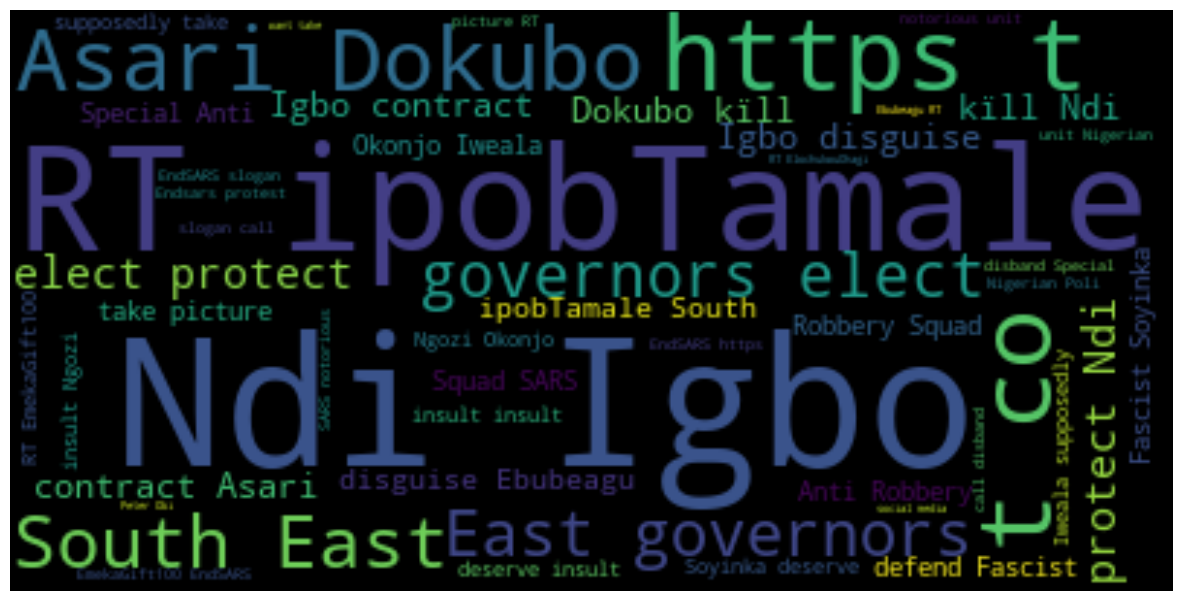

In [715]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer
snowball = SnowballStemmer(language = 'english')
from nltk.tokenize import word_tokenize
import string, re, nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
nltk.download('wordnet')

#instantiate lemmatize; change words in past to present, third person to first person
wn = WordNetLemmatizer()

stopword = set(stopwords.words('english'))

def word_join(text):
    text = (' '.join([word for word in text.split(' ') if word not in stopword]))
    text = ' '.join([wn.lemmatize(word, pos='v') for word in text.split(' ')])
    return text


text = ' '.join(word for word in tweet_df['text'].apply(word_join))
wordcloud = WordCloud(stopwords = set(STOPWORDS), background_color = 'black', max_words=50).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
#plt.title('key Words in All Courses')
plt.axis('off')
plt.show()